In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import heapq

In [2]:
def get_neighbors(x, y, size):
    """Return 8-connected neighbor coordinates within bounds."""
    neighbors = []
    directions = [(-1,-1), (-1,0), (-1,1), (0,-1), (0,1), (1,-1), (1,0), (1,1)]

    for dx, dy in directions:
        nx, ny = x + dx, y + dy
        if 0 <= nx < size and 0 <= ny < size:
            neighbors.append((nx, ny))
    return neighbors

def plot_tumor_growth(info, grid_size, tumors, title, color_bar=True):
    plt.figure(figsize=(8, 8))  # Create a new figure for each plot
    plt.imshow(info, cmap='Wistia')
    plt.title(title)
    if color_bar:
        cbar = plt.colorbar(shrink=0.8)  # Make the colorbar 80% of its original height
        cbar.set_label('Resistance of Voxels', labelpad=10) # Increased labelpad for more space
        # Set colorbar ticks
        cbar.set_ticks(np.arange(0, 1.1, 0.1))

    y_coords, x_coords = np.where(tumors == 1)
    plt.scatter(x_coords, y_coords, color='black', label='Cancerous Voxel', marker='o', s=3)
    plt.legend()
    plt.xticks(np.arange(0, grid_size+1, 50))
    plt.yticks(np.arange(0, grid_size+1, 50))
    plt.gca().invert_yaxis()

    plt.show()

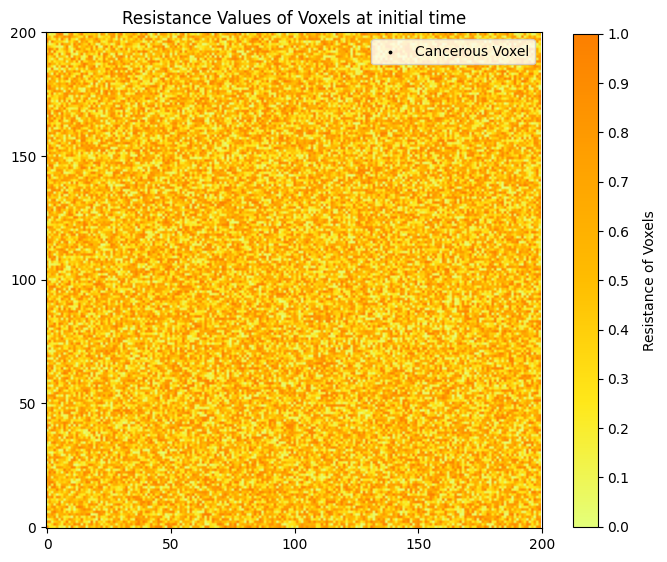

In [3]:
grid_size = 200
tumor_mask = np.zeros((grid_size, grid_size), dtype=np.int32)
resistance = np.random.rand(grid_size, grid_size)  # random resistance field
plot_tumor_growth(resistance, grid_size, tumor_mask, title="Resistance Values of Voxels at initial time", color_bar=True)

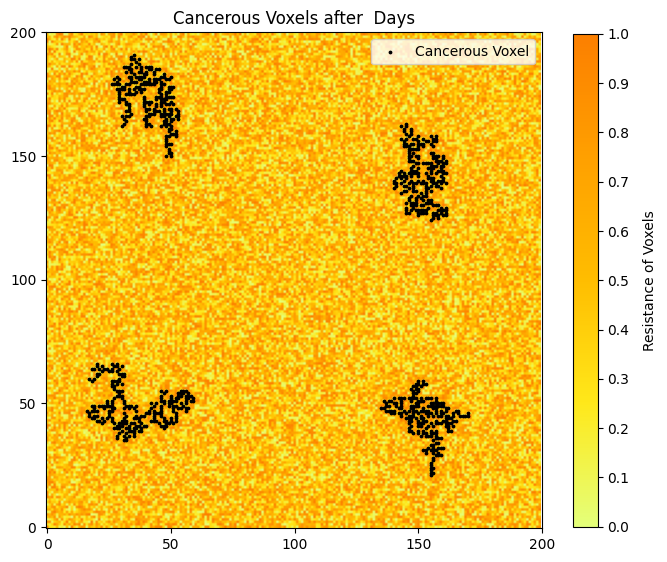

In [4]:
seed_positions = [(50, 50), (50, 150), (150, 50), (150, 150)]  # corners-ish

for (sx, sy) in seed_positions:
    frontier = []
    tumor_mask[sx, sy] = 1
    for nx, ny in get_neighbors(sx, sy, grid_size):
        if tumor_mask[nx, ny] == 0:
            heapq.heappush(frontier, (resistance[nx, ny], (nx, ny)))

    # --- 3) Invasion percolation growth (unchanged) ---
    step = 0
    growth_steps = 360  # 2 weeks at 1 hour/step
    steps = []

    while frontier and step < growth_steps:
        step += 1
        res, (x, y) = heapq.heappop(frontier)
        if tumor_mask[x, y] == 0:
            tumor_mask[x, y] = 1
            for nx, ny in get_neighbors(x, y, grid_size):
                if tumor_mask[nx, ny] == 0:
                    heapq.heappush(frontier, (resistance[nx, ny], (nx, ny)))

plot_tumor_growth(resistance, grid_size, tumor_mask, title=f"Cancerous Voxels after  Days", color_bar=True)


In [5]:
import csv

with open('multiple_tumors_voxels.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(tumor_mask)

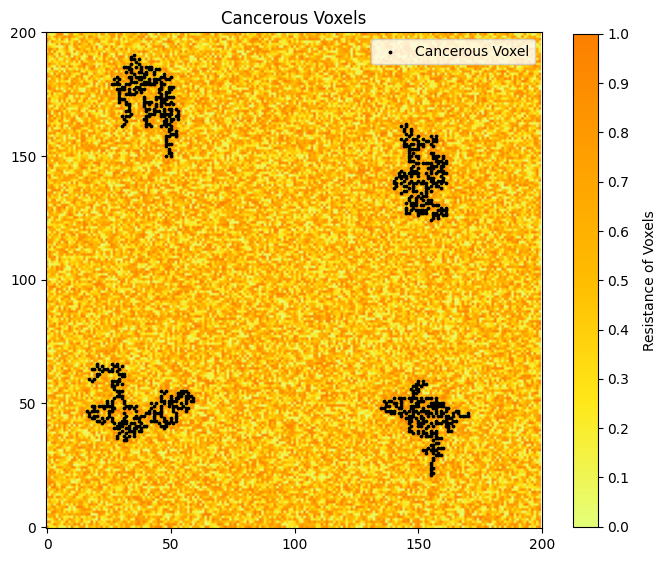

In [6]:
import pandas as pd

tumor_voxels = pd.read_csv("multiple_tumors_voxels.csv").to_numpy()
plot_tumor_growth(resistance, grid_size, tumor_mask, title=f"Cancerous Voxels", color_bar=True)